# Временные ряды. Линейная регрессия + Белый шум

Задание:

- Загрузите датасет *BostonHousing* из библиотеки *sklearn* (с ним мы работали ранее).
- Обучите линейную регрессию стоимости дома на параметры $CRIM$, $RM$.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
data = load_boston()

print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
x, y = data['data'], data['target']

df = pd.DataFrame(
    data=np.hstack([x, y.reshape(-1,1)]),
    columns=list(data['feature_names']) + ['price']
)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
x = df[['CRIM', 'RM']].values
y = df['price'].values

solver = LinearRegression()
solver.fit(x, y)

LinearRegression()

# Задание 3.1

Выведите коэффициенты модели, округлив ответ до сотых:
- $CRIM$
- $RM$
- $Intercept$

In [6]:
print(f'CRIM={solver.coef_[0]:.2f}')

CRIM=-0.26


In [7]:
print(f'RM={solver.coef_[1]:.2f}')

RM=8.39


In [8]:
print(f'Intercept={solver.intercept_:.2f}')

Intercept=-29.24


## Задание 3.2

Найдите долю объясненной дисперсии.

In [9]:
y_pred = solver.predict(x)

score = r2_score(y, y_pred)
print(f'R^2={score:.2f}')

R^2=0.54


## Задание 3.3

Сгенерируйте вектор белого шума и добавьте к исходным значениям целевой переменой. Обучите модель и найдите $R^2$ (долю объясненной дисперсии). 

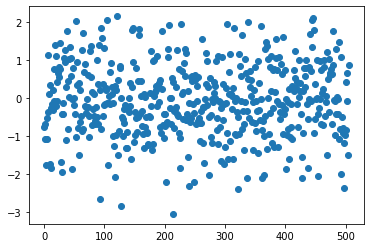

In [10]:
N = x.shape[0]
mu = 0
sigma = 1 
eps = np.random.normal(mu, sigma, size=N)

plt.scatter(np.arange(N), eps)

In [11]:
x = df[['CRIM', 'RM']].values
y = df['price'].values
y += eps

solver = LinearRegression()
solver.fit(x, y)

LinearRegression()

In [12]:
y_pred = solver.predict(x)

score = r2_score(y, y_pred)
print(f'R^2={score:.2f}')

r2_wn = score

R^2=0.53


## Задание 3.4

Сгенерируйте вектор гетероскедастичного шума аналогично разобранному примеру с параметром $\alpha=1.002$ и добавьте к исходным значениям целевой переменной. Обучите модель и найдите $R^2$ (долю объясненной дисперсии).

In [13]:
# создадим функцию, которая будет портить белый шум, добавляя в него неравные дисперсии.
# Кажое следующее значение шума будет в alpha раз выше предыдущего

def hetero_eps(alpha, eps):
    hetero_eps = np.zeros(len(eps))
    for i in range (0,len(eps)):
        hetero_eps[i] = (alpha**i) * eps[i]
    return hetero_eps

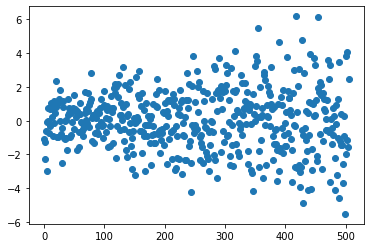

In [14]:
N = x.shape[0]
mu = 0
sigma = 1 

eps = np.random.normal(mu, sigma, size=N)

alpha = 1.002
heteps = hetero_eps(alpha,eps) # гетероскедастичный шум

plt.scatter(np.arange(N), heteps)

In [15]:
x = df[['CRIM', 'RM']].values
y = df['price'].values
y += heteps

solver = LinearRegression()
solver.fit(x, y)

LinearRegression()

In [16]:
y_pred = solver.predict(x)

score = r2_score(y, y_pred)
print(f'R^2={score:.2f}')

r2_heta1002 = score

R^2=0.50


## Задание 3.5

В каком случае (доля объясненной дисперсии) получается лучше?

In [17]:
print('Для белого шума:', r2_wn > r2_heta1002)
print('Для гетероскедастичного шума с параметром a=1.002:', r2_heta1002 > r2_wn)

Для белого шума: True
Для гетероскедастичного шума с параметром a=1.002: False


## Задание 3.6

Сгенерируйте вектор гетероскедастичного шума аналогично разобранному примеру с параметром $\alpha=0.998$ и добавьте к исходным значениям целевой переменной. Обучите модель и найдите $R^2$ (долю объясненной дисперсии).

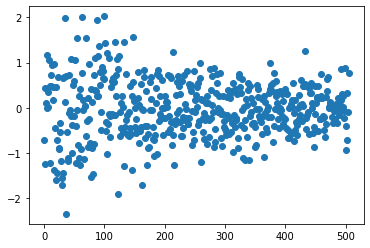

In [18]:
N = x.shape[0]
mu = 0
sigma = 1 

eps = np.random.normal(mu, sigma, size=N)

alpha = 0.998
heteps = hetero_eps(alpha,eps) # гетероскедастичный шум

plt.scatter(np.arange(N), heteps)

In [19]:
x = df[['CRIM', 'RM']].values
y = df['price'].values
y += heteps

solver = LinearRegression()
solver.fit(x, y)

LinearRegression()

In [20]:
y_pred = solver.predict(x)

score = r2_score(y, y_pred)
print(f'R^2={score:.2f}')

r2_heta0998 = score

R^2=0.50


## Задание 3.7

В каком случае (доля объясненной дисперсии) получается лучше?

In [21]:
print('Для белого шума:', r2_wn > r2_heta0998)
print('Для гетероскедастичного шума с параметром a=0.998:', r2_heta0998 > r2_wn)

Для белого шума: True
Для гетероскедастичного шума с параметром a=0.998: False
